In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('ggplot')
from google.colab import files
adfile=files.upload()

Saving AgeGroupDetails.csv to AgeGroupDetails (1).csv
Saving covid_19_india.csv to covid_19_india (1).csv
Saving HospitalBedsIndia.csv to HospitalBedsIndia (1).csv
Saving ICMRTestingDetails.csv to ICMRTestingDetails (1).csv
Saving ICMRTestingLabs.csv to ICMRTestingLabs (1).csv
Saving IndividualDetails.csv to IndividualDetails (1).csv
Saving population_india_census2011.csv to population_india_census2011 (1).csv


In [ ]:
df1 = pd.read_csv('AgeGroupDetails.csv')
df2 = pd.read_csv('HospitalBedsIndia.csv')
df3 = pd.read_csv('ICMRTestingDetails.csv')
df4 = pd.read_csv('IndividualDetails.csv')
df5 = pd.read_csv('ICMRTestingLabs.csv')
df6 = pd.read_csv('covid_19_india.csv')

# EDA
**1) AGE GROUP DETAILS** 

In [ ]:
df1.drop('Sno', axis=1, inplace=True)

In [ ]:
df1

,AgeGroup,TotalCases,Percentage
0,0-9,22,3.18%
1,10-19,27,3.90%
2,20-29,172,24.86%
3,30-39,146,21.10%
4,40-49,112,16.18%
5,50-59,77,11.13%
6,60-69,89,12.86%
7,70-79,28,4.05%
8,>=80,10,1.45%
9,Missing,9,1.30%


In [ ]:
df1['Percentage']=df1['Percentage'].apply(lambda X:float(X[:-1]))

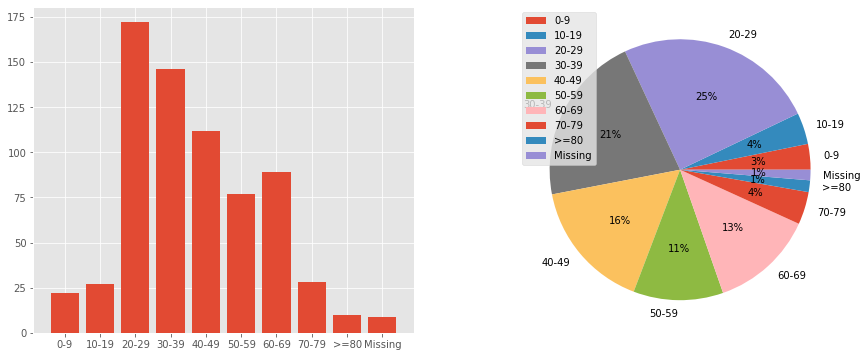

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax = ax.flatten()

ax[0].bar(x=df1['AgeGroup'], height=df1['TotalCases']);

ax[1].pie(x=df1['Percentage'],labels=df1['AgeGroup'], autopct='%1.0f%%');
ax[1].legend();

**The Age Group 20-29 has the most Number of Case followed by Age Group 30-39, and 40**

**2) Hospital Beds in India**

In [ ]:
df2.info

<bound method DataFrame.info of      Sno                   State/UT  ... Unnamed: 12 Unnamed: 13
0    1.0  Andaman & Nicobar Islands  ...         NaN         NaN
1    2.0             Andhra Pradesh  ...         NaN         NaN
2    3.0          Arunachal Pradesh  ...         NaN         NaN
3    4.0                      Assam  ...         NaN         NaN
4    5.0                      Bihar  ...         NaN         NaN
5    6.0                 Chandigarh  ...         NaN         NaN
6    7.0               Chhattisgarh  ...         NaN         NaN
7    8.0       Dadra & Nagar Haveli  ...         NaN         NaN
8    9.0                Daman & Diu  ...         NaN         NaN
9   10.0                      Delhi  ...         NaN         NaN
10  11.0                        Goa  ...         NaN         NaN
11  12.0                    Gujarat  ...         NaN         NaN
12  13.0                    Haryana  ...         NaN         NaN
13  14.0           Himachal Pradesh  ...         NaN      

In [ ]:
df2.drop(['Sno', 'Unnamed: 12', 'Unnamed: 13', 'NumPrimaryHealthCenters_HMIS',
          'NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS',
          'NumDistrictHospitals_HMIS'], axis=1, inplace=True)

In [ ]:
df2.dropna(how='all', inplace=True)
df2.drop(index=36, inplace=True)

In [ ]:
df2.isnull().sum()

State/UT                            0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [ ]:
# Adding all the beds available
df2['Total Beds'] = df2['NumPublicBeds_HMIS'].astype('int') + df2['NumRuralBeds_NHP18'].astype('int') + df2['NumUrbanBeds_NHP18']
df2.drop(['NumPublicBeds_HMIS', 'NumRuralBeds_NHP18', 'NumUrbanBeds_NHP18'], axis=1, inplace=True)



In [ ]:
# Adding all the Hospitals
df2['Total Hospitals'] = df2['NumRuralHospitals_NHP18'] + df2['NumUrbanHospitals_NHP18']
df2.drop(['NumRuralHospitals_NHP18', 'NumUrbanHospitals_NHP18'], axis=1, inplace=True)

In [ ]:
for column in df2.columns[1:]:
    df2[column] = df2[column].astype('int')

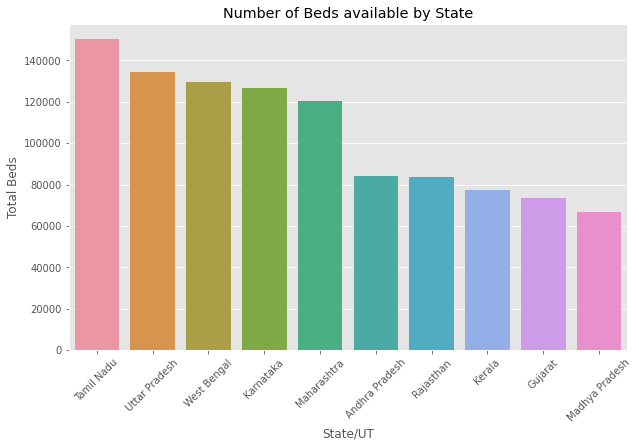

In [ ]:
temp_df = df2.sort_values(by='Total Beds', ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.barplot(x='State/UT', y='Total Beds', data=temp_df);
plt.title('Number of Beds available by State');

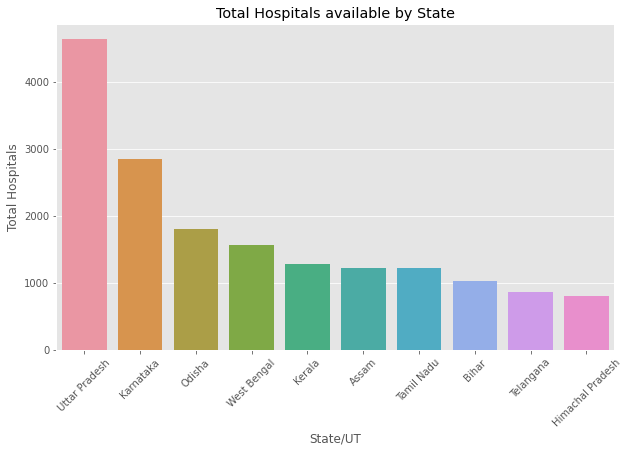

In [ ]:
temp_df = df2.sort_values(by='Total Hospitals', ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.barplot(x='State/UT', y='Total Hospitals', data=temp_df);

plt.title('Total Hospitals available by State');


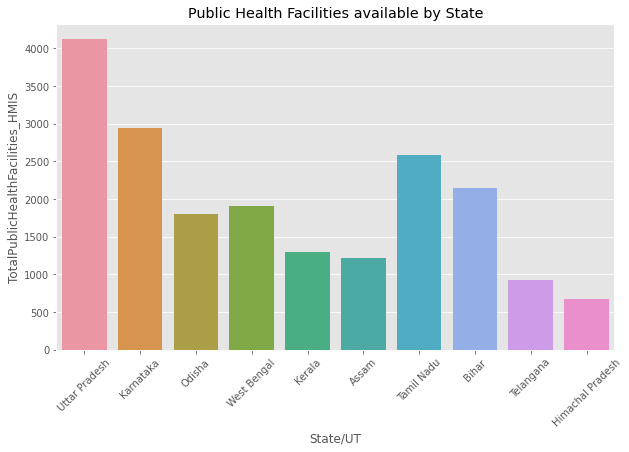

In [ ]:

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.barplot(x='State/UT', y='TotalPublicHealthFacilities_HMIS', data=temp_df);

plt.title('Public Health Facilities available by State');

In [ ]:
df3.drop(['Source', 'SNo'], axis=1, inplace=True)
df3.dropna(subset=['TotalPositiveCases'], inplace=True)

df3['DateTime'] = df3['DateTime'].apply(lambda X:X.split(' ')[0])
df3['DateTime'] = pd.to_datetime(df3['DateTime'], dayfirst=True)

In [ ]:
df6.dropna(how='all', inplace=True)
df6.drop(['Sno', 'ConfirmedForeignNational', 'ConfirmedIndianNational', 'Time'], axis=1, inplace=True)

In [ ]:
df6['Date'] = pd.to_datetime(df6['Date'], dayfirst=True)

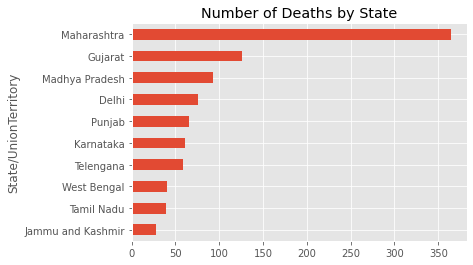

In [ ]:
df6.groupby('State/UnionTerritory').agg('sum')['Deaths'].nlargest(10)[::-1].plot(kind='barh');
plt.title('Number of Deaths by State');

**Maharashtra has highest number of Deaths, followed by Gujrat and Madhya Pradesh**

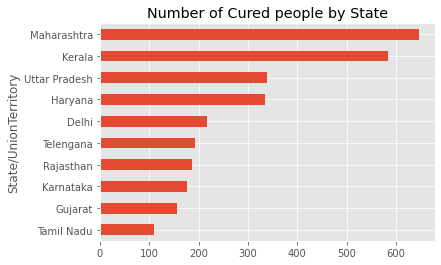

In [ ]:
df6.groupby('State/UnionTerritory').agg('sum')['Cured'].nlargest(10)[::-1].plot(kind='barh');
plt.title('Number of Cured people by State');

**Maharashtra has highest number of Cured people, followed by Kerala and Uttar Pradesh**

Text(0.5, 1.0, 'Number of Confirmed Cases by State')

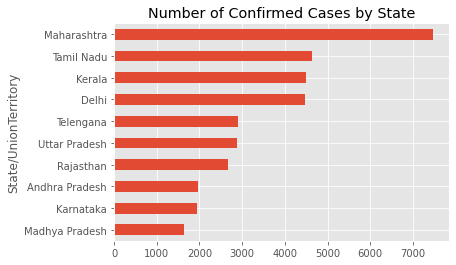

In [ ]:
df6.groupby('State/UnionTerritory').agg('sum')['Confirmed'].nlargest(10)[::-1].plot(kind='barh');
plt.title('Number of Confirmed Cases by State')

**Maharashtra has highest number of Confirmed Cases, followed by Tamil Nadu and Kerala**

In [ ]:
df4.describe

<bound method NDFrame.describe of         id  ...                                              notes
0        0  ...                               Travelled from Wuhan
1        1  ...                               Travelled from Wuhan
2        2  ...                               Travelled from Wuhan
3        3  ...                      Travelled from Austria, Italy
4        4  ...  Travelled from Dubai to Bangalore on 20th Feb,...
...    ...  ...                                                ...
6816  6816  ...                                    Details awaited
6817  6817  ...                                    Details awaited
6818  6818  ...                                    Details awaited
6819  6819  ...                                    Details awaited
6820  6820  ...                                    Details awaited

[6821 rows x 12 columns]>

Text(0.5, 1.0, '')

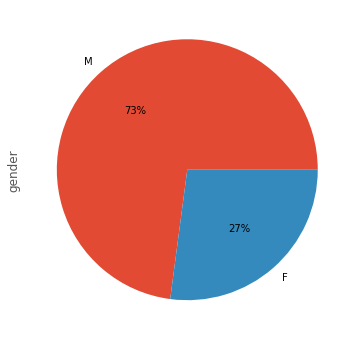

In [ ]:
df4.drop(['id', 'diagnosed_date', 'nationality','detected_city', 'status_change_date',
          'notes', 'current_status', 'diagnosed_date', 
          'government_id', 'detected_state', 'age'], axis=1, inplace=True)

plt.figure(figsize=(10, 6))
df4['gender'].value_counts().plot(kind='pie', autopct='%1.0f%%', );
plt.title('')

**Modelling Steps**

In [ ]:
temp_df = df6.groupby('Date')['Confirmed'].agg('sum').to_frame().reset_index()


In [ ]:
#We will consider the Confirmed cases recorded during the lockdown days as our training data
X = temp_df['Date']
y = temp_df['Confirmed']

In [ ]:
Days = np.arange(1, len(temp_df)+1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
poly_features = PolynomialFeatures(degree=4)

In [ ]:
poly_Days = poly_features.fit_transform(Days.reshape(-1, 1))

In [ ]:
y

0        1.0
1        1.0
2        2.0
3        3.0
4        3.0
       ...  
66    3577.0
67    4281.0
68    4789.0
69    5274.0
70    5865.0
Name: Confirmed, Length: 71, dtype: float64

In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(poly_Days, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
poly_reg.score(poly_Days,y)

0.9900671807528597

**High R2 score means the regression curve is perfectly able to plot the trend in increase in the number of cases**

In [ ]:
y_predicted = poly_reg.predict(poly_Days)

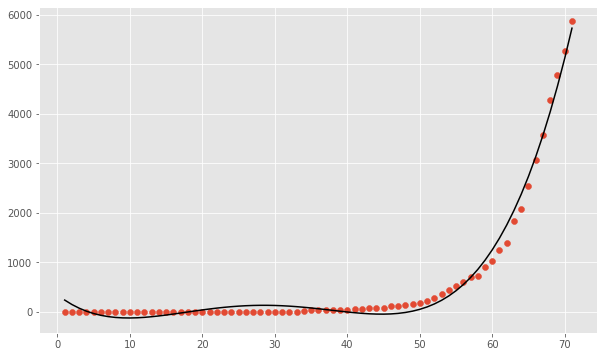

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Days,y)

plt.plot(Days, y_predicted , color='k')

plt.show()

**Observations**

The red dots represent the rate of increase in the number of confirmed cases